### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

### Starter

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [5]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# Exploratory Data Analysis

Understanding total count of people who have Fully Paid Loan and who has still Charge of with them

<Axes: xlabel='loan_status', ylabel='count'>

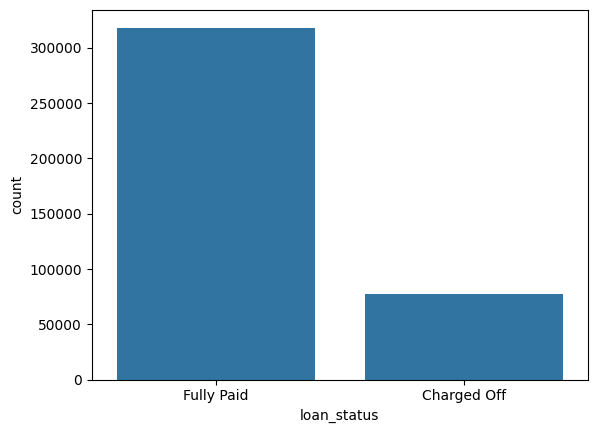

In [8]:
sns.countplot(x='loan_status',data=df)

Based on Diagram and below code output we can see, there are total around 396K data out of which 318.3K are Fully paid status and 77.6K are still Charged off

In [9]:
len(df)

396030

In [10]:
len(df[df["loan_status"] == "Fully Paid"])

318357

In [11]:
len(df[df["loan_status"] == "Charged Off"])

77673

Distribution of Data based on Loan Amount

(0.0, 45000.0)

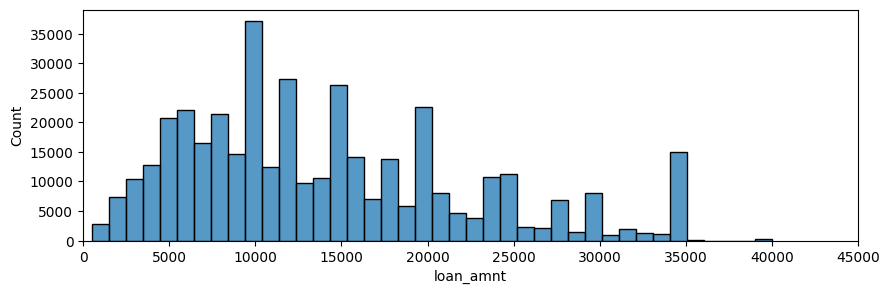

In [12]:
plt.figure(figsize=(10,3))
sns.histplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

Understanding the correlation between installment column and loan Amount

In [13]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [14]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

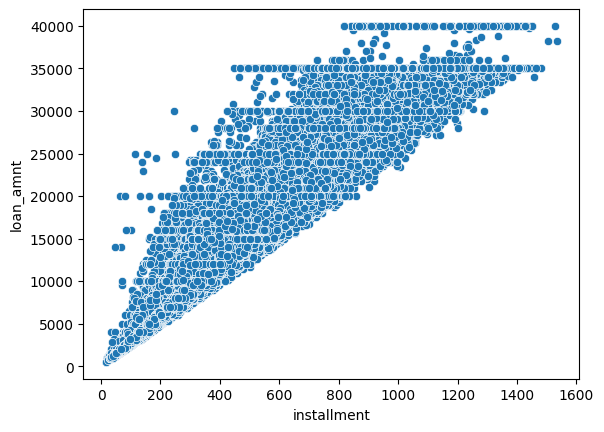

In [15]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

Lets have an understanding between loan amount and Loan status

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

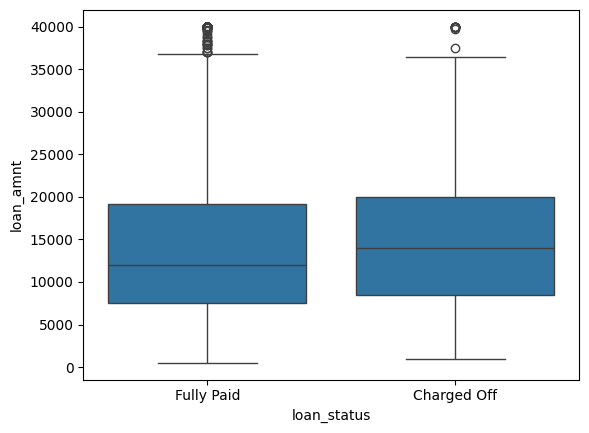

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


By an observation we can conclude on average of 151.1K Loan amount is still to be Charge off and 138.6K Loan amount is fully paid

Let's Analyse the Grade and Subgrade Feature and it's relevance to the Loan status

In [18]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Representing the Loan status based on grade and understanding the outcome of records

<Axes: xlabel='grade', ylabel='count'>

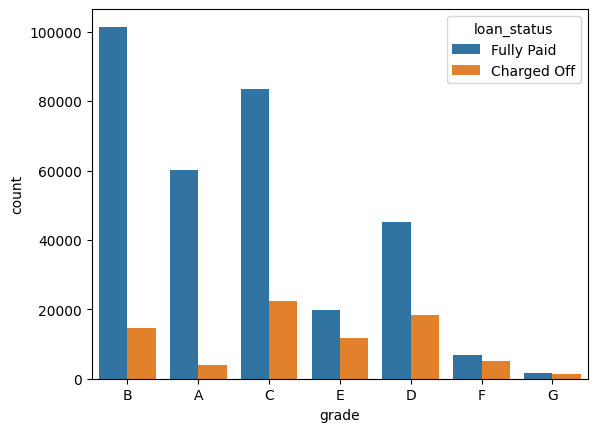

In [20]:
sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

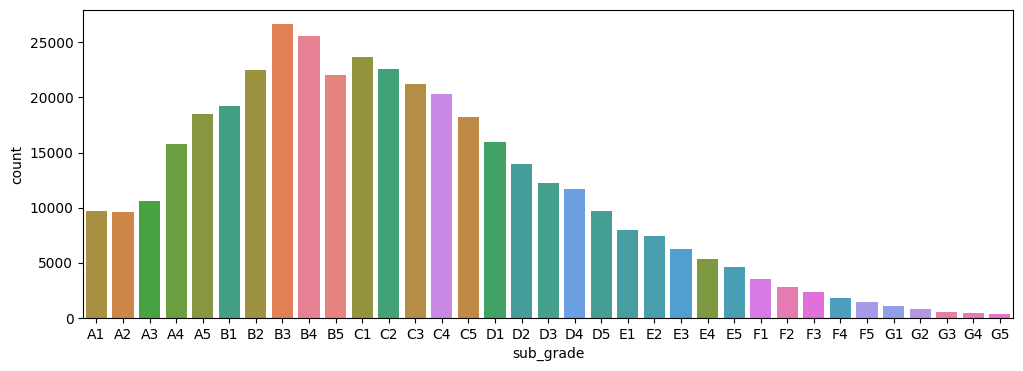

In [21]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order, hue='sub_grade', legend=False )

<Axes: xlabel='sub_grade', ylabel='count'>

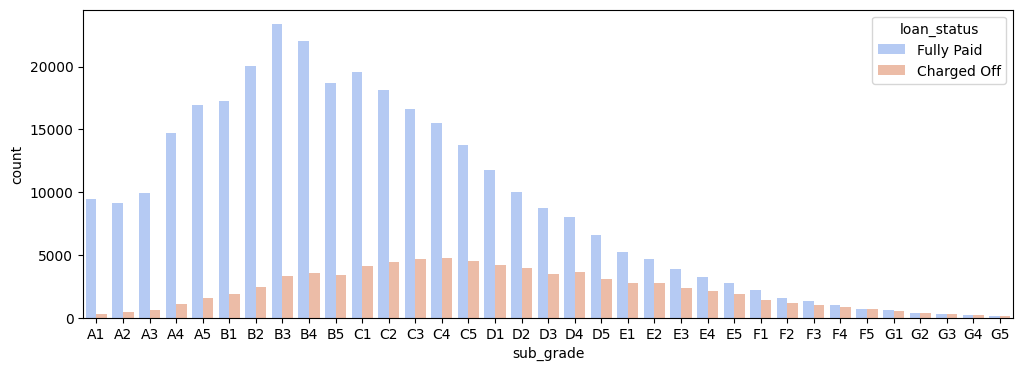

In [22]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades

<Axes: xlabel='sub_grade', ylabel='count'>

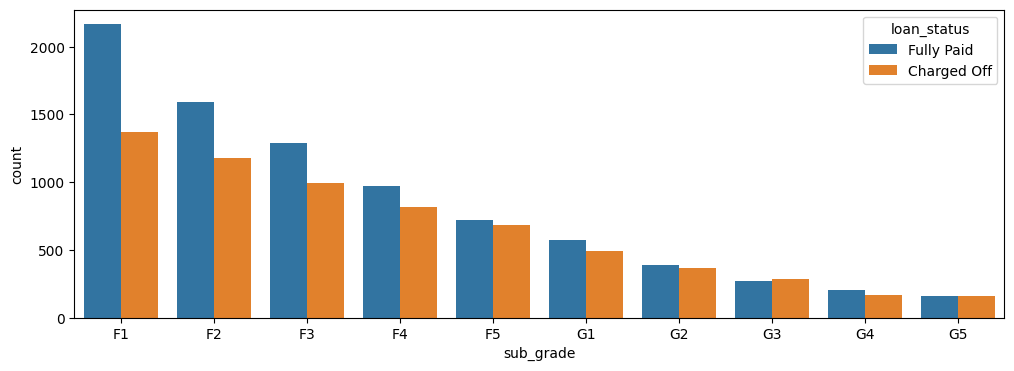

In [23]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

We can conclude the F and G category Loan seems more risky than other as in this category Fully Paid and charged off ratio is quite similar 

Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [24]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [25]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [26]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


We can now drop Loan status and use Loan repaid column for further processing

# Data PreProcessing

**Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

Create a Series that displays the total count of missing values per column.

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Convert this Series to be in term of percentage of the total DataFrame

In [28]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info()

In [29]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


How many unique employment job titles are there?

In [30]:
df['emp_title'].nunique()

173105

In [31]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [32]:
df = df.drop('emp_title',axis=1)

 Create a count plot of the emp_length feature column. Sort the order of the values.

In [33]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [34]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

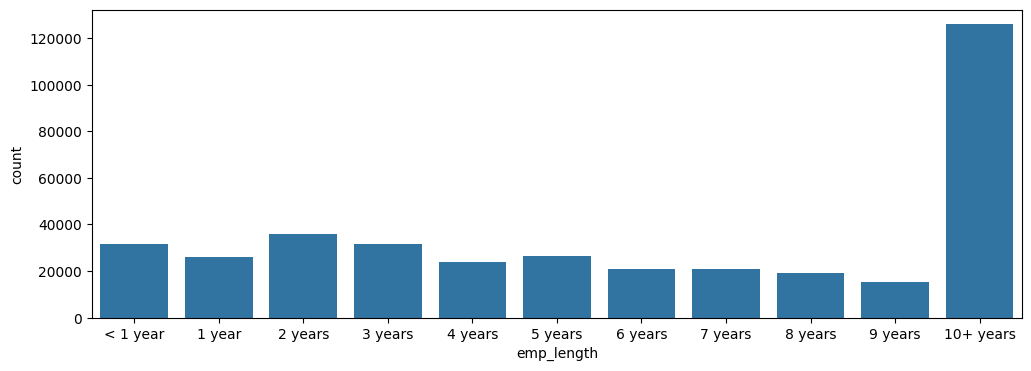

In [35]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

Plot out the countplot with a hue separating Fully Paid vs Charged Off

<Axes: xlabel='emp_length', ylabel='count'>

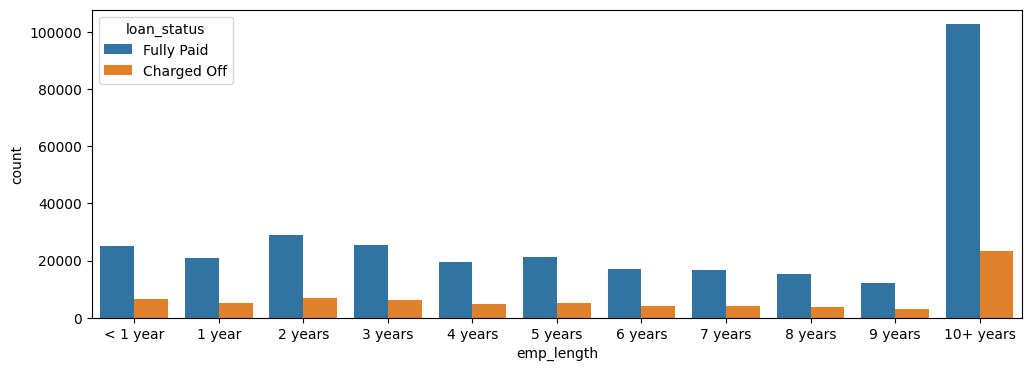

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series.

In [37]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [38]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [39]:
emp_len = emp_co/emp_fp

<Axes: xlabel='emp_length'>

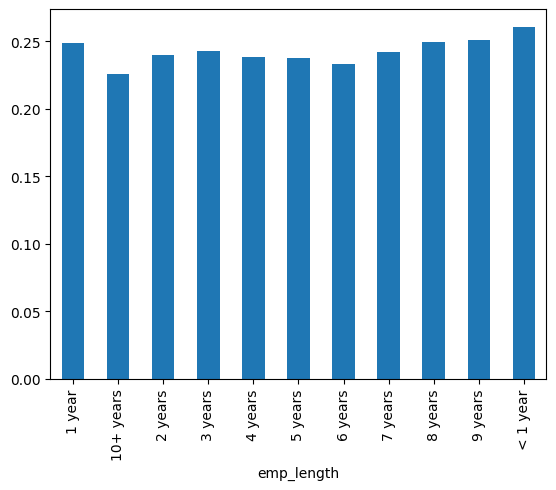

In [40]:
emp_len.plot(kind='bar')

Charge off rates are extremely similar across all employment lengths. We can Go ahead and drop the emp_length column.

In [41]:
df = df.drop('emp_length',axis=1)

Revisit the DataFrame to see what feature columns still have missing data.

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Review the title column vs the purpose column. Is this repeated information?

df['purpose'].head(10)

In [43]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.

In [44]:
df = df.drop('title',axis=1)

Find out what the mort_acc feature represents

In [45]:
feat_info('mort_acc')

Number of mortgage accounts.


Create a value_counts of the mort_acc column.

In [46]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc

In [47]:
df.groupby('total_acc')["mort_acc"].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.

In [48]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [49]:
total_acc_avg[2.0]

0.0

In [50]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [52]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().

In [53]:
df = df.dropna()

In [54]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [55]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().

In [56]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [57]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

We already know grade is part of sub_grade, so just drop the grade feature.

In [58]:
df = df.drop('grade',axis=1)

Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call

In [59]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [60]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [61]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [62]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [63]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

Review the value_counts for the home_ownership column.

In [64]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

Convert these to dummy variables, but [replace] NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [65]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [66]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.

In [67]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [68]:
df = df.drop('issue_d',axis=1)

This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature

In [69]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [70]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

We converted loan status with loan repaid column already we can drop this column now

In [71]:
df = df.drop('loan_status',axis=1)

In [72]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

## Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

Perform a train/test split with test_size=0.2 and a random_state of 101.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

**Using a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers]

In [80]:
model = tf.keras.models.Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.3535 - val_loss: 0.2651
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.2657 - val_loss: 0.2635
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.2646 - val_loss: 0.2632
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.2622 - val_loss: 0.2629
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2614 - val_loss: 0.2620
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.2614 - val_loss: 0.2615
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.2601 - val_loss: 0.2617
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.2580 - val_loss: 0.2616
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.2597 - val_loss: 0.2610
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.2579 - val_loss: 0.2613
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.2586 - val_loss: 0.2626
Epoch 12/25
1236/1236

In [ ]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5')  

#Evaluating Model Performance.

**Plot out the validation loss versus the training loss.

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses[['loss','val_loss']].plot()

Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
#predictions = model.predict_classes(X_test)
predictions = model.predict(X_test)
predictions = [1 if a > 0.5 else 0 for a in predictions]


In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)

Given the customer below, would you offer this person a loan?

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

In [ ]:
nc = scaler.fit_transform(new_customer.values.reshape(1,78))

In [ ]:
nc = model.predict(nc)
result = [1 if a > 0.5 else 0 for a in nc]
result

Now check, did this person actually end up paying back their loan?

In [ ]:
df.iloc[random_ind]['loan_repaid']